<a href="https://colab.research.google.com/github/SHREE-KRIPAAA/Emotion-detection-from-text/blob/main/Cyfuture_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
!pip install neattext pandas numpy seaborn scikit-learn matplotlib

In [25]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import neattext.functions as nfx
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.utils import resample


In [26]:
# Load the dataset
file_path = "/content/sample_data/tweet_emotions.csv"  # Update path if needed
df = pd.read_csv(file_path)

# Display dataset info
print(df.info())
print(df.head())

# Check unique emotions
print("Unique Emotions:", df['sentiment'].unique())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   40000 non-null  int64 
 1   sentiment  40000 non-null  object
 2   content    40000 non-null  object
dtypes: int64(1), object(2)
memory usage: 937.6+ KB
None
     tweet_id   sentiment                                            content
0  1956967341       empty  @tiffanylue i know  i was listenin to bad habi...
1  1956967666     sadness  Layin n bed with a headache  ughhhh...waitin o...
2  1956967696     sadness                Funeral ceremony...gloomy friday...
3  1956967789  enthusiasm               wants to hang out with friends SOON!
4  1956968416     neutral  @dannycastillo We want to trade with someone w...
Unique Emotions: ['empty' 'sadness' 'enthusiasm' 'neutral' 'worry' 'surprise' 'love' 'fun'
 'hate' 'happiness' 'boredom' 'relief' 'anger']


<ipython-input-27-500d44da36cd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['sentiment'], order=df['sentiment'].value_counts().index, palette="coolwarm")


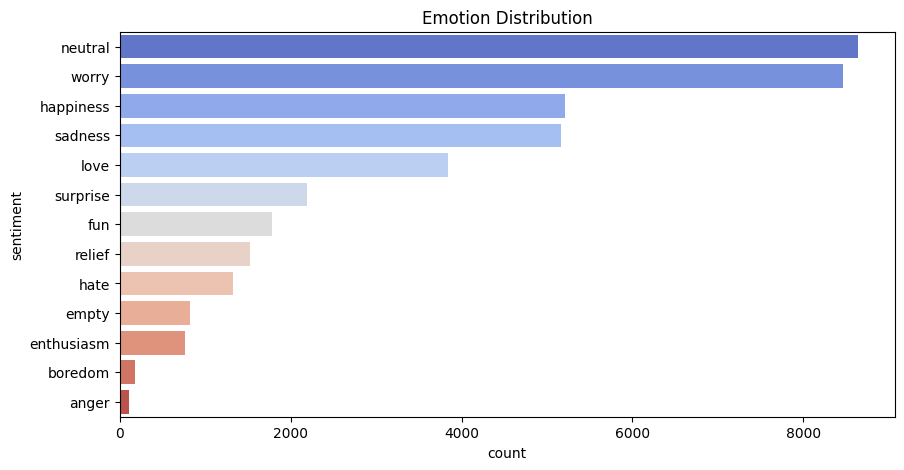

In [27]:
# Plot emotion distribution
plt.figure(figsize=(10,5))
sns.countplot(y=df['sentiment'], order=df['sentiment'].value_counts().index, palette="coolwarm")
plt.title("Emotion Distribution")
plt.show()


In [28]:
# Handle class imbalance by upsampling minority classes
max_samples = df['sentiment'].value_counts().max()
df_balanced = df.groupby('sentiment', group_keys=False).apply(lambda x: x.sample(max_samples, replace=True))


<ipython-input-28-2c4b222f28a4>:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_balanced = df.groupby('sentiment', group_keys=False).apply(lambda x: x.sample(max_samples, replace=True))


In [29]:
# Apply text cleaning functions
df_balanced['clean_text'] = df_balanced['content'].apply(nfx.remove_userhandles) # Remove @usernames
df_balanced['clean_text'] = df_balanced['clean_text'].apply(nfx.remove_stopwords) # Remove stopwords
df_balanced['clean_text'] = df_balanced['clean_text'].apply(nfx.remove_special_characters) # Remove special chars

# Display cleaned text
print(df_balanced[['content', 'clean_text']].head())


                                                 content  \
13328               People at work are stressing me out.   
24681  @iaindodsworth Told you that when you got rid ...   
19224  UUUUUGH!!! I HATE I MISSED @WAYNEDASTAR INTERV...   
17480  Just found out my parents are putting down my ...   
16034           @ACMcWhale I always feel guilty about it   

                                             clean_text  
13328                         People work stressing out  
24681                           Told got rid one listen  
19224     UUUUUGH HATE MISSED INTERVIEW WASNT HOME DARN  
17480  found parents putting dog tomorrow morning Upset  
16034                                       feel guilty  


In [30]:
# Convert text to numerical format with improved vectorization
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X = vectorizer.fit_transform(df_balanced['clean_text'])

# Labels
y = df_balanced['sentiment']


In [31]:
# Split Data (Stratified to maintain class balance)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [32]:
# Train SVM Model (performs better than Naïve Bayes)
model = SVC(kernel='linear')
model.fit(X_train, y_train)
# Make Predictions
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))



Accuracy: 0.6177924217462932
Classification Report:
               precision    recall  f1-score   support

       anger       1.00      1.00      1.00      1727
     boredom       0.99      1.00      1.00      1728
       empty       0.63      0.78      0.69      1728
  enthusiasm       0.68      0.84      0.75      1728
         fun       0.53      0.63      0.58      1728
   happiness       0.41      0.37      0.39      1727
        hate       0.71      0.78      0.75      1728
        love       0.56      0.53      0.55      1728
     neutral       0.32      0.31      0.31      1727
      relief       0.61      0.63      0.62      1727
     sadness       0.48      0.42      0.45      1728
    surprise       0.54      0.47      0.50      1727
       worry       0.40      0.26      0.32      1728

    accuracy                           0.62     22459
   macro avg       0.61      0.62      0.61     22459
weighted avg       0.61      0.62      0.61     22459



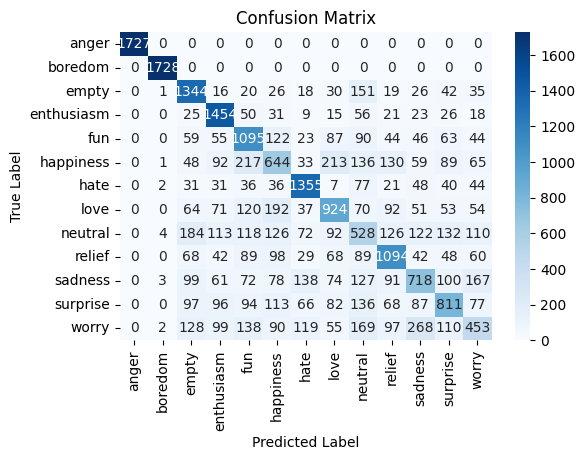

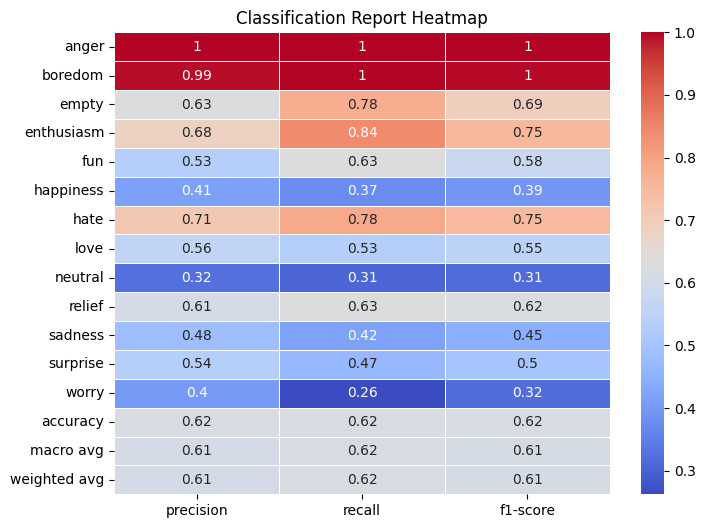

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # ✅ Add this line

# 1️⃣ Plot Confusion Matrix
plt.figure(figsize=(6, 4))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# 2️⃣ Visualizing Classification Report
report = classification_report(y_test, y_pred, output_dict=True)
plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Classification Report Heatmap")
plt.show()

In [45]:
def predict_emotion(text):
    """Function to predict emotion of a given text input."""
    clean_text = nfx.remove_userhandles(text)
    clean_text = nfx.remove_stopwords(clean_text)
    clean_text = nfx.remove_special_characters(clean_text)

    text_vectorized = vectorizer.transform([clean_text])
    prediction = model.predict(text_vectorized)[0]

    return prediction

# User input for emotion prediction
while True:
    user_text = input("\nEnter a sentence (or type 'exit' to quit): ")

    if user_text.lower() == 'exit':
        print("Exiting emotion detection. Goodbye!")
        break

    emotion = predict_emotion(user_text)
    print(f"🔍 Predicted Emotion: {emotion}")



Enter a sentence (or type 'exit' to quit): Wondering how come mcdonalds take so long to deliver my food.
🔍 Predicted Emotion: hate

Enter a sentence (or type 'exit' to quit): I am dying to hangout on a Friday afternoon...
🔍 Predicted Emotion: neutral

Enter a sentence (or type 'exit' to quit): Ya, the weather has been super weird here. It looked like it was gonna rain today but of course it didn't
🔍 Predicted Emotion: hate

Enter a sentence (or type 'exit' to quit): Happy mother's day!
🔍 Predicted Emotion: love

Enter a sentence (or type 'exit' to quit): my throat hurts gonna go read and go to bed. text mee!
🔍 Predicted Emotion: sadness

Enter a sentence (or type 'exit' to quit): exit
Exiting emotion detection. Goodbye!


In [34]:
!pip install streamlit pandas neattext scikit-learn


In [35]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
from google.colab import files

# Load training dataset
df = pd.read_csv("/content/sample_data/tweet_emotions.csv")  # Ensure this file contains text data


if "content" not in df.columns:
    raise ValueError("CSV file must have a 'content' column containing text.")

# Initialize and fit the vectorizer
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X_train = vectorizer.fit_transform(df["content"])  # Fit on the text column

# Save the fitted vectorizer to a pickle file
with open("vectorizer.pkl", "wb") as vec_file:
    pickle.dump(vectorizer, vec_file)

print("✅ Vectorizer retrained and saved successfully!")

# Reload the vectorizer to verify it was saved correctly
with open("vectorizer.pkl", "rb") as vectorizer_file:
    vectorizer = pickle.load(vectorizer_file)

# Check if the vectorizer has been fitted by verifying the presence of the `idf_` attribute
if hasattr(vectorizer, "idf_"):
    print("✅ Vectorizer loaded successfully and is properly trained.")
else:
    print("❌ Vectorizer not properly trained.")

# Download the saved pickle files for use in other environments
files.download("vectorizer.pkl")


✅ Vectorizer retrained and saved successfully!
✅ Vectorizer loaded successfully and is properly trained.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [36]:
from google.colab import files

files.download("model.pkl")
files.download("vectorizer.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>